In [86]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
(x_train,y_train ),(x_test,y_test) =mnist.load_data()
x_train,x_val ,y_train,y_val =train_test_split(x_train,y_train,test_size=0.2,random_state=42)



In [87]:
import pandas as pd
# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Create DataFrames
df_train = pd.DataFrame(x_train_flat)
df_train['label'] = y_train
df_test = pd.DataFrame(x_test_flat)
df_test['label'] = y_test
df = pd.concat([df_train, df_test], axis=0)
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [88]:
x_train.shape


(48000, 28, 28)

## Normalization and reshaping

In [89]:
x_train.shape


(48000, 28, 28)

## Build a CNN Model

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,MaxPooling2D,Flatten ,Dense ,Input
model =Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=32 ,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu' ),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

## Compile and Train the Model

In [91]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val) , batch_size=64)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9329 - loss: 0.6686 - val_accuracy: 0.9719 - val_loss: 0.0950
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9790 - loss: 0.0687 - val_accuracy: 0.9697 - val_loss: 0.1034
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9856 - loss: 0.0464 - val_accuracy: 0.9746 - val_loss: 0.0929
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.9858 - val_loss: 0.0537
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9898 - loss: 0.0327 - val_accuracy: 0.9832 - val_loss: 0.0626
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9919 - loss: 0.0257 - val_accuracy: 0.9839 - val_loss: 0.0586
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9915 - loss: 0.0260 - val_accuracy: 0.9827 - val_loss: 0.0742
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9933 - loss: 0.0220 - 

## Evaluating model

In [92]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9838 - loss: 0.0624
Test accuracy: 0.9837999939918518
Test loss: 0.06244707480072975


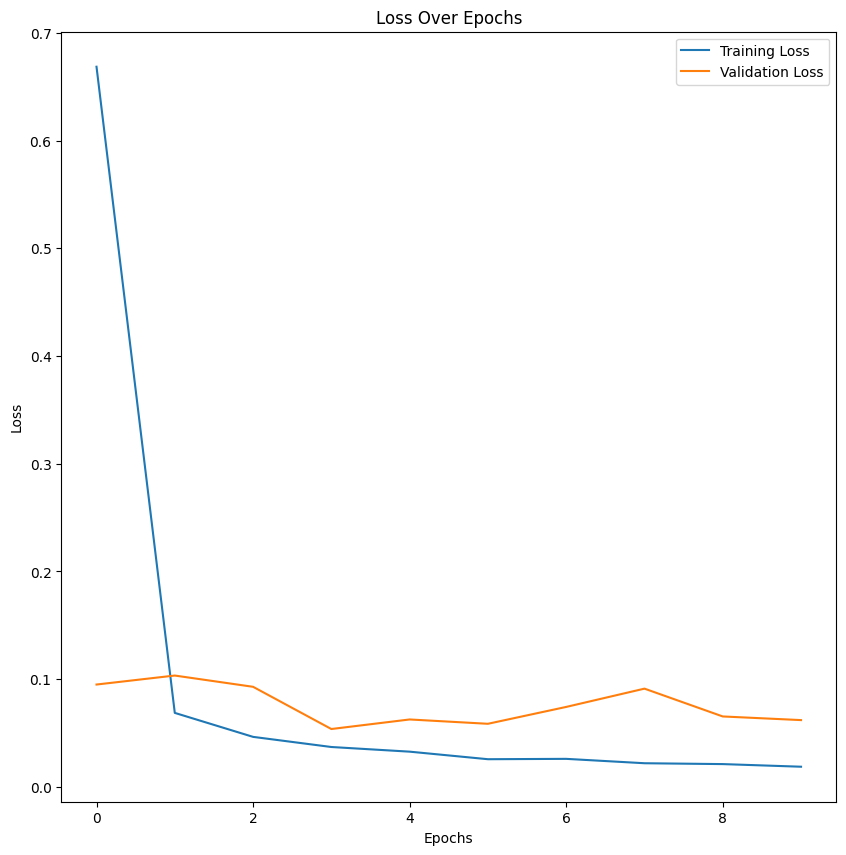

In [93]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

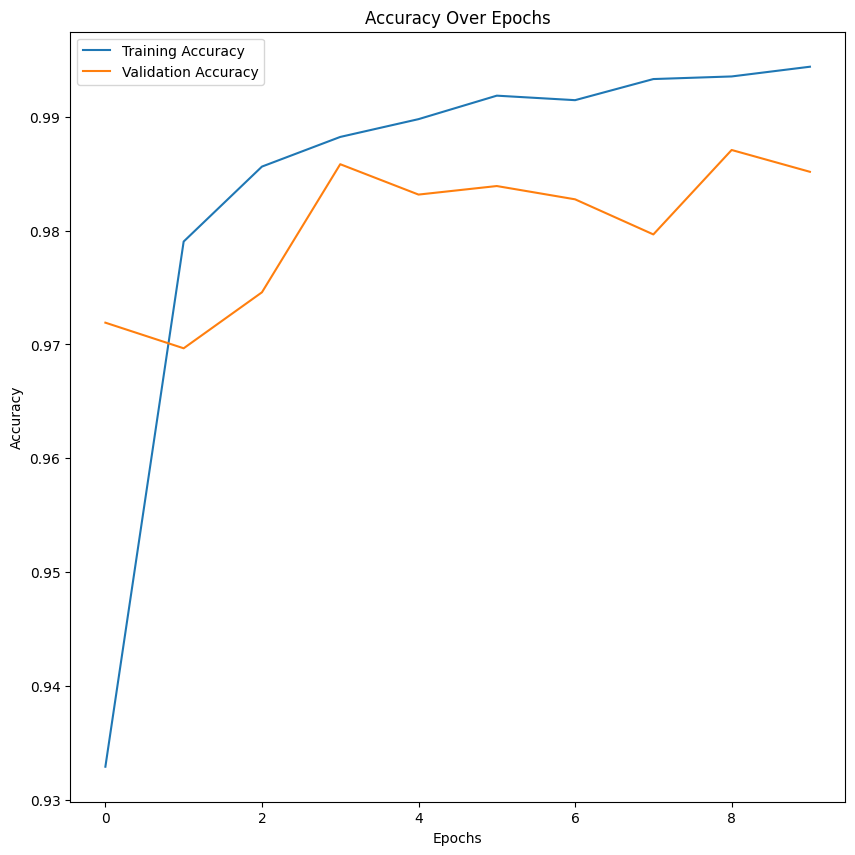

In [94]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Adding Dropout to avoid overfitting 

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist

# --- Load MNIST ---
(x_train, y_train), (x_val, y_val) = mnist.load_data()

# --- Normalize ---
x_train = x_train.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0

# --- Reshape ---
x_train4 = x_train.reshape(-1, 28, 28, 1)
x_val_4 = x_val.reshape(-1, 28, 28, 1)

# --- Data Augmentation ---
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)
datagen.fit(x_train4)

# --- Model ---
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Early stopping ---
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# --- Train ---
batch_size = 64
epochs = 20

history = model.fit(
    datagen.flow(x_train4, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_val_4, y_val),
    callbacks=[early_stopping],
    steps_per_epoch=len(x_train4) // batch_size
)





Epoch 1/20


d:\Telegram Desktop\generative ai course\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Telegram Desktop\generative ai course\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.8577 - loss: 0.4475 - val_accuracy: 0.9854 - val_loss: 0.0500
Epoch 2/20
  1/937 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9688 - loss: 0.1605

d:\Telegram Desktop\generative ai course\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.1605 - val_accuracy: 0.9860 - val_loss: 0.0484
Epoch 3/20
937/937 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9480 - loss: 0.1718 - val_accuracy: 0.9860 - val_loss: 0.0417
Epoch 4/20
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.1599 - val_accuracy: 0.9875 - val_loss: 0.0397
Epoch 5/20
937/937 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9631 - loss: 0.1273 - val_accuracy: 0.9896 - val_loss: 0.0312
Epoch 6/20
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9219 - loss: 0.2393 - val_accuracy: 0.9900 - val_loss: 0.0297
Epoch 7/20
937/937 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9670 - loss: 0.1106 - val_accuracy: 0.9911 - val_loss: 0.0243
Epoch 8/20
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0936 - val_accuracy: 0.9910 - val_loss: 0.0245
Epoch 9/20
937/937 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9731 - loss: 0.0923 - val_accuracy: 0.991

In [96]:
print(history.history['accuracy'])
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')



[0.8576648235321045, 0.96875, 0.9479945302009583, 0.96875, 0.9631273150444031, 0.921875, 0.9669981598854065, 0.96875, 0.973071277141571, 0.984375, 0.9750567078590393, 0.96875, 0.9771923422813416, 0.953125, 0.9781934022903442, 0.96875, 0.9791777729988098, 1.0]
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9498 - loss: 28.8645
Test accuracy: 0.9498000144958496
Test loss: 28.864471435546875


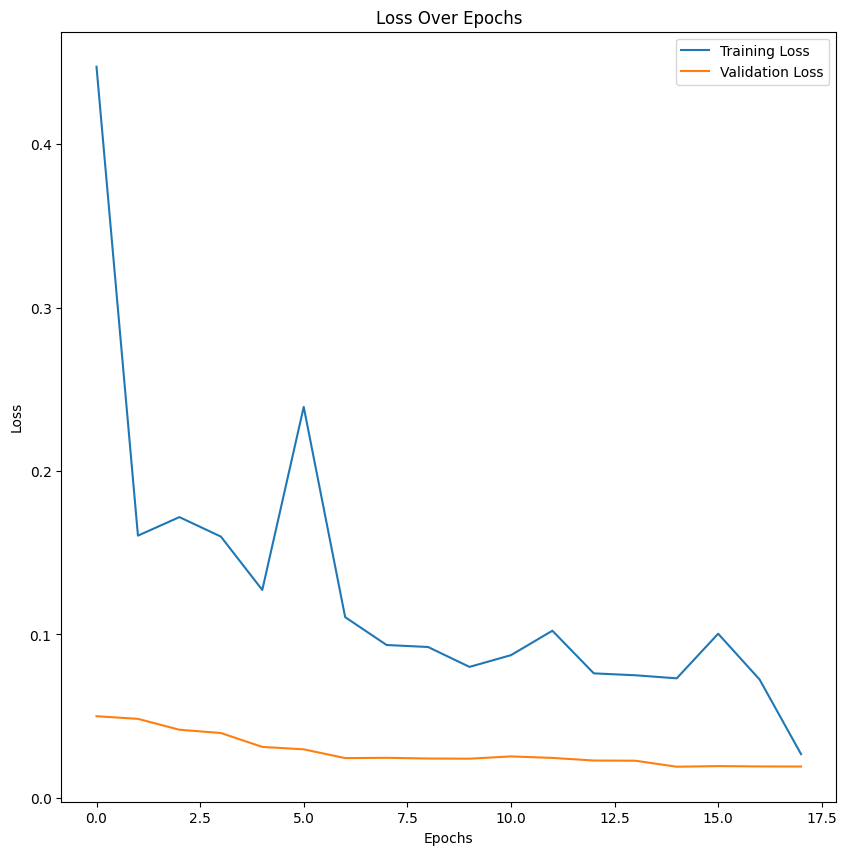

In [97]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

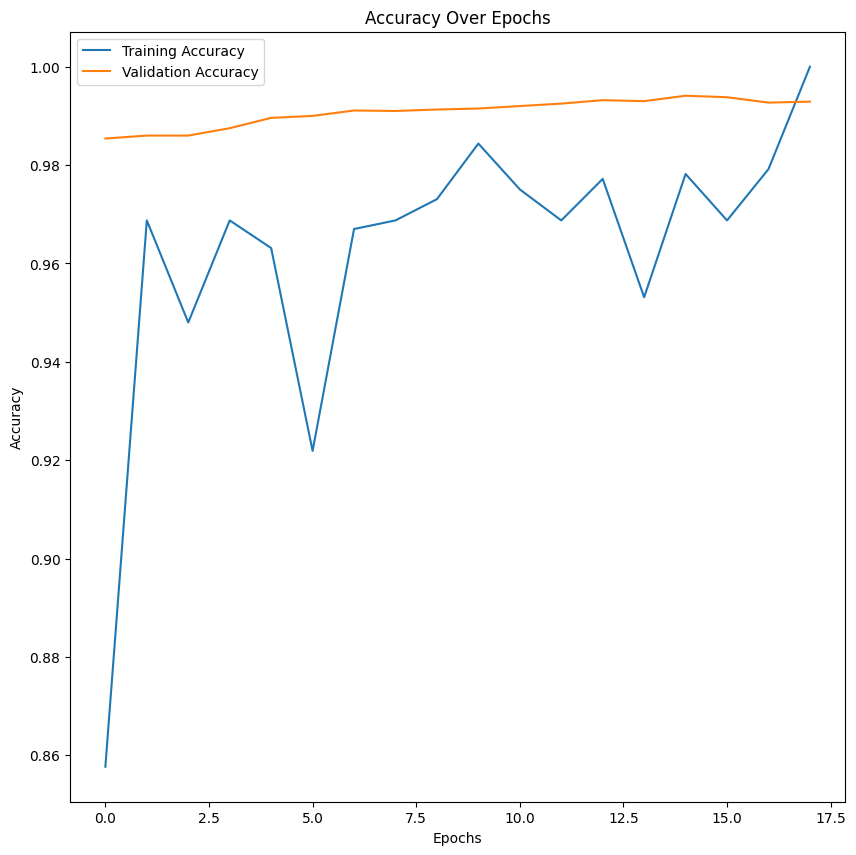

In [98]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [99]:
# --- Save ---
model.save("robust_mnist_cnn_model.keras")
print("Model saved to robust_mnist_cnn_model.keras")

Model saved to robust_mnist_cnn_model.keras


In [100]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("robust_mnist_cnn_model.keras")

# Load and preprocess input image
img = cv2.imread("digit7.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))             # resize
# DO NOT invert colors
img = img.astype("float32") / 255.0         # normalize
img = img.reshape(1, 28, 28, 1)

# Predict
pred = model.predict(img)
predicted_digit = int(np.argmax(pred))
confidence = float(np.max(pred))

print({
    "predicted_digit": predicted_digit,
    "confidence": round(confidence, 4)
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
{'predicted_digit': 7, 'confidence': 1.0}


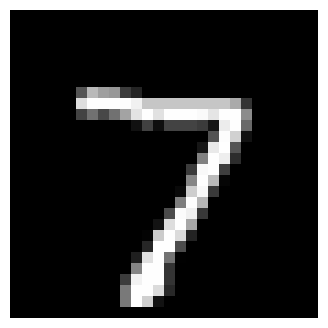

In [101]:
# 1. Select the array to display (x_test[0])
image_array = x_test[0]

# 2. Check and fix the shape if necessary
# MNIST images are (28, 28) or sometimes (28, 28, 1). imshow prefers (28, 28).
if image_array.ndim == 3 and image_array.shape[-1] == 1:
    # Reshape from (28, 28, 1) to (28, 28)
    image_array = image_array.reshape(28, 28)

# 3. Display the image
plt.figure(figsize=(4, 4))
# 'cmap="gray"' is used because MNIST is a grayscale dataset.
plt.imshow(image_array, cmap="gray")
plt.axis('off') # Hide the axis ticks for a cleaner look
plt.show()

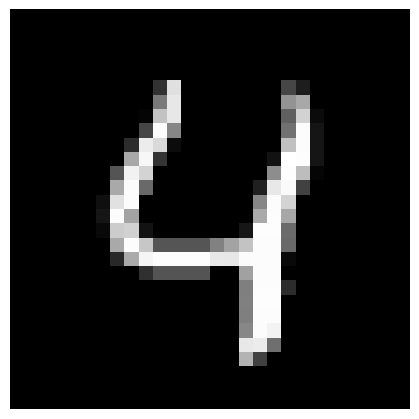

In [102]:
image_array = x_test[4]

# 1. Create a figure and an axes object
fig = plt.figure(figsize=(4, 4))
ax = plt.Axes(fig, [0., 0., 1., 1.]) # Define axes to fill the entire figure [left, bottom, width, height]

# 2. Configure the axes to remove all borders/padding
ax.set_axis_off()
fig.add_axes(ax)

# 3. Display the image
# 'interpolation="nearest"' prevents blurring on the small 28x28 image
ax.imshow(image_array, cmap="gray", interpolation='nearest')

# 4. Save the figure without any extra padding/whitespace
# Set bbox_inches='tight' and pad_inches=0 to ensure no extra whitespace is saved
# You must save to a file to truly see the lack of border, as the viewer still has a frame.
plt.savefig('digit_no_border.png', bbox_inches='tight', pad_inches=0, transparent=True) 

# 5. Show the image (this will still have the viewer frame, but the saved image won't)
plt.show()

True label (y_test[4]): 4


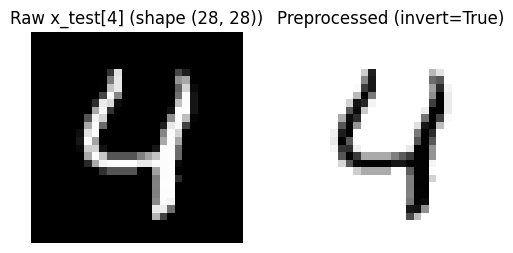

Preprocessed stats (invert=True) min,max: 0.0 1.0
Preprocessed stats (invert=False) min,max: 0.0 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Prediction when invert=True:
Top 5 predictions (class:prob):
  0: 0.7796
  2: 0.1119
  8: 0.0974
  9: 0.0076
  6: 0.0022
predicted: 0 conf: 0.7795538306236267

Prediction when invert=False:
Top 5 predictions (class:prob):
  4: 1.0000
  9: 0.0000
  6: 0.0000
  7: 0.0000
  1: 0.0000
predicted: 4 conf: 0.999996542930603

Test accuracy (model.evaluate): 0.9941, test loss: 0.0191
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Confusion matrix sample (rows=true, cols=pred).
[[ 975    0    1    1    0    0    0    3    0    0]
 [   0 1127    2    1    0    0    0    5    0    0]
 [   1    0 1029    0    0    0    0    2    0    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    0    0  979    0    0    1    0    2]
 [   0    0    0    5    0  886    1    0    0    0]
 [   1    4    0    0    1    2  949

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import confusion_matrix, classification_report

# --- pick the example index you tested earlier ---
idx = 4

# 1) show true label
print("True label (y_test[{}]):".format(idx), int(y_test[idx]))

# 2) show raw test image (original MNIST values 0-255 or 0-1 depending on dataset)
raw_img = x_test[idx]
# If values are in 0-1 range, scale to 0-255 for display clarity
if raw_img.max() <= 1.0:
    raw_disp = (raw_img * 255).astype("uint8")
else:
    raw_disp = raw_img.astype("uint8")

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(raw_disp, cmap='gray')
plt.title(f"Raw x_test[{idx}] (shape {raw_img.shape})")
plt.axis('off')

# 3) create two preprocess variants: invert and not invert
def preprocess_for_model(img_arr, invert=True):
    # input img_arr shape expected (28,28) or (28,28,1) and values 0-255 or 0-1
    a = img_arr.copy()
    if a.ndim == 3 and a.shape[-1] == 1:
        a = a.reshape(28,28)
    # scale to 0-255 if needed
    if a.max() <= 1.0:
        a = (a * 255).astype("uint8")
    else:
        a = a.astype("uint8")
    if invert:
        a = 255 - a
    a = a.astype("float32") / 255.0
    a = a.reshape(1,28,28,1)
    return a

pre_inv = preprocess_for_model(raw_img, invert=True)
pre_noinv = preprocess_for_model(raw_img, invert=False)

# show preprocessed (inverted) image that we feed model
plt.subplot(1,2,2)
plt.imshow(pre_inv.reshape(28,28), cmap='gray')
plt.title("Preprocessed (invert=True)")
plt.axis('off')
plt.show()

print("Preprocessed stats (invert=True) min,max:", pre_inv.min(), pre_inv.max())
print("Preprocessed stats (invert=False) min,max:", pre_noinv.min(), pre_noinv.max())

# 4) model predictions for both variants
pred_inv = model.predict(pre_inv)
pred_noinv = model.predict(pre_noinv)

def print_topk(pred_array, k=5):
    probs = pred_array[0]
    topk_idx = np.argsort(probs)[::-1][:k]
    print("Top {} predictions (class:prob):".format(k))
    for i in topk_idx:
        print(f"  {i}: {probs[i]:.4f}")
    return topk_idx

print("\nPrediction when invert=True:")
topk_inv = print_topk(pred_inv, k=5)
print("predicted:", int(np.argmax(pred_inv)), "conf:", float(np.max(pred_inv)))

print("\nPrediction when invert=False:")
topk_noinv = print_topk(pred_noinv, k=5)
print("predicted:", int(np.argmax(pred_noinv)), "conf:", float(np.max(pred_noinv)))

# 5) quick accuracy on test set (ensure x_test has channel dim and is normalized the same way)
# Prepare x_test for evaluation (match how you trained the model)
xt = x_test.copy()
if xt.max() > 1.0:
    xt = xt.astype("float32") / 255.0
if xt.ndim == 3:  # (N,28,28)
    xt4 = xt.reshape(-1,28,28,1)
else:
    xt4 = xt

loss, acc = model.evaluate(xt4, y_test, verbose=0)
print(f"\nTest accuracy (model.evaluate): {acc:.4f}, test loss: {loss:.4f}")

# 6) confusion matrix and top confusions (only if dataset not huge — MNIST is fine)
y_pred = np.argmax(model.predict(xt4), axis=1)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix sample (rows=true, cols=pred).")
print(cm)

# Show top confusions per class
for cls in range(10):
    row = cm[cls].copy()
    row[cls] = 0  # ignore diagonal
    most_confused = np.argsort(row)[::-1][:3]
    print(f"Class {cls} most confused with: {most_confused} counts: {row[most_confused]}")

# Optional: classification report
print("\nClassification report (precision/recall/f1):")
print(classification_report(y_test, y_pred, digits=4))
